For SVM:
Check these links for reference -
*   https://github.com/MintForever/Machine-Learning-Assignments/blob/master/assignments1-4/xl9yr__assignment_2_svm.ipynb





In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/RT_IOT2022.csv')
data

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,udp,dns,0.005875,1,1,1,1,170.209561,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,tcp,-,7.807541,159,144,134,38,20.364926,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,tcp,http,0.216894,7,7,1,2,32.273807,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,icmp,-,0.014496,10,10,10,10,689.841286,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,tcp,-,8.797776,158,176,133,45,17.959084,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209954,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209955,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209956,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209957,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [4]:
duplicate_rows = data[data.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
        id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
616          5353       5353   udp     dns            0.0             1   
1735         5353       5353   udp     dns            0.0             1   
1761         5353       5353   udp     dns            0.0             1   
2201         5353       5353   udp     dns            0.0             1   
2373        48692        443   tcp       -            0.0             1   
...           ...        ...   ...     ...            ...           ...   
206059       5353       5353   udp     dns            0.0             1   
206109      59342         80   tcp       -            0.0             1   
206548       5353       5353   udp     dns            0.0             1   
206675       5353       5353   udp     dns            0.0             1   
206676       5353       5353   udp     dns            0.0             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
616

In [5]:
# Save DataFrame as a CSV file
duplicate_rows.to_csv('duplicate_rows.csv', index=False)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(204544, 84)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204544 entries, 0 to 209958
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 204544 non-null  int64  
 1   id.resp_p                 204544 non-null  int64  
 2   proto                     204544 non-null  object 
 3   service                   204544 non-null  object 
 4   flow_duration             204544 non-null  float64
 5   fwd_pkts_tot              204544 non-null  int64  
 6   bwd_pkts_tot              204544 non-null  int64  
 7   fwd_data_pkts_tot         204544 non-null  int64  
 8   bwd_data_pkts_tot         204544 non-null  int64  
 9   fwd_pkts_per_sec          204544 non-null  float64
 10  bwd_pkts_per_sec          204544 non-null  float64
 11  flow_pkts_per_sec         204544 non-null  float64
 12  down_up_ratio             204544 non-null  float64
 13  fwd_header_size_tot       204544 non-null  int64 

In [9]:
data['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 90089
Alexa                         86622
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [10]:
data['proto'].value_counts()

proto
tcp     185349
udp      17157
icmp      2038
Name: count, dtype: int64

In [11]:
data.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

In [12]:
# Dropping rows based on 'Attack_type' column values as these have very low values

data_new = data[~data['Attack_type'].isin(['Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN'])]

In [13]:
data_new['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping          90089
Alexa                  86622
Thing_Speak             7654
ARP_poisioning          7625
MQTT_Publish            4142
NMAP_UDP_SCAN           2584
NMAP_XMAS_TREE_SCAN     2010
NMAP_OS_DETECTION       2000
NMAP_TCP_scan           1002
DDOS_Slowloris           533
Wipro_bulb               219
Name: count, dtype: int64

In [14]:
data_new.shape

(204480, 84)

In [15]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [16]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['proto'], use_cat_names=True)

# Fit and transform the data
X_new = encoder.fit_transform(data_new)


In [17]:
X_new.head()

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,1,0,0,dns,0.005875,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,0,1,0,-,7.807541,159,144,134,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,0,1,0,http,0.216894,7,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,0,0,1,-,0.014496,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,0,1,0,-,8.797776,158,176,133,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa


##BALANCING DATASET

# **SOLVING IMBALANCE----------------------------------------------------------------------**

# **OVERSAMPLING THE LOWER CLASSES**

In [18]:
X_new.to_csv('complete_encoded_dataset.csv', index=False)

In [19]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')
large_df.head()

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,1,0,0,dns,0.005875,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,0,1,0,-,7.807541,159,144,134,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,0,1,0,http,0.216894,7,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,0,0,1,-,0.014496,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,0,1,0,-,8.797776,158,176,133,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa


In [20]:
# Define the specific class labels you want to filter
desired_labels = ['NMAP_TCP_scan', 'DDOS_Slowloris', 'Wipro_bulb']

# Filter the dataset to include only rows with desired class labels
smaller_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
smaller_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
smaller_df.to_csv('lower_class_dataset.csv', index=False)

In [21]:
data_to_oversamp=pd.read_csv('lower_class_dataset.csv')
data_to_oversamp

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,52170,443,0,1,0,ssl,1.873034,10,11,5,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,4380,65535,4380,Wipro_bulb
1,62443,53,1,0,0,dns,0.006028,1,1,1,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,0,0,0,Wipro_bulb
2,49795,6668,0,1,0,-,22.644121,5,6,2,...,3016277.820,6129478.931,1.186331e+07,17992789.98,8996394.992,4.054432e+06,65535,4380,0,Wipro_bulb
3,49797,6668,0,1,0,irc,78.044458,38,25,13,...,4518600.340,5014911.890,5.916898e+06,31662307.74,5277051.290,3.381018e+05,65535,4380,65535,Wipro_bulb
4,49800,6668,0,1,0,irc,96.762810,69,53,24,...,8109716.924,5859549.999,1.657937e+07,51309290.17,8551548.362,4.045696e+06,65535,4380,65535,Wipro_bulb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,59074,64623,0,1,0,-,0.000001,1,1,0,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1750,49670,64680,0,1,0,-,0.000004,1,1,0,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1751,47298,65000,0,1,0,-,0.000003,1,1,0,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1752,49246,65129,0,1,0,-,0.000002,1,1,0,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240,NMAP_TCP_scan


In [22]:
data_to_oversamp['Attack_type'].value_counts()

Attack_type
NMAP_TCP_scan     1002
DDOS_Slowloris     533
Wipro_bulb         219
Name: count, dtype: int64

In [23]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_oversamp = data_to_oversamp['Attack_type']
X_oversamp = data_to_oversamp.drop(columns=['Attack_type', 'service'])
X_oversamp

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,52170,443,0,1,0,1.873034,10,11,5,4,...,2.761923e+06,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,4380,65535,4380
1,62443,53,1,0,0,0.006028,1,1,1,1,...,6.027937e+03,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,0,0,0
2,49795,6668,0,1,0,22.644121,5,6,2,5,...,2.325666e+06,3016277.820,6129478.931,1.186331e+07,17992789.98,8996394.992,4.054432e+06,65535,4380,0
3,49797,6668,0,1,0,78.044458,38,25,13,13,...,6.627024e+06,4518600.340,5014911.890,5.916898e+06,31662307.74,5277051.290,3.381018e+05,65535,4380,65535
4,49800,6668,0,1,0,96.762810,69,53,24,34,...,6.495426e+06,8109716.924,5859549.999,1.657937e+07,51309290.17,8551548.362,4.045696e+06,65535,4380,65535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,59074,64623,0,1,0,0.000001,1,1,0,0,...,9.536740e-01,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240
1750,49670,64680,0,1,0,0.000004,1,1,0,0,...,4.053116e+00,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240
1751,47298,65000,0,1,0,0.000003,1,1,0,0,...,3.099442e+00,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240
1752,49246,65129,0,1,0,0.000002,1,1,0,0,...,1.907349e+00,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240


In [24]:
y_oversamp

0          Wipro_bulb
1          Wipro_bulb
2          Wipro_bulb
3          Wipro_bulb
4          Wipro_bulb
            ...      
1749    NMAP_TCP_scan
1750    NMAP_TCP_scan
1751    NMAP_TCP_scan
1752    NMAP_TCP_scan
1753    NMAP_TCP_scan
Name: Attack_type, Length: 1754, dtype: object

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train_oversamp, X_test_oversamp, y_train_oversamp, y_test_oversamp = train_test_split(X_oversamp, y_oversamp, test_size=0.3, random_state=42)

In [26]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Define the desired number of samples for each class
# For example, if you want to oversample class 0 to have 1000 instances and class 1 to have 1500 instances
desired_samples = {'NMAP_TCP_scan':1200, 'DDOS_Slowloris':1200, 'Wipro_bulb':1200}
#desired_samples = {'NMAP_TCP_scan':5000, 'DDOS_Slowloris':5000, 'Wipro_bulb':5000}
#CHANGE THIS----------------------------------------------------------------------------------------------------------------------------

# Initialize the SMOTE algorithm with a custom sampling strategy
smote = SMOTE(sampling_strategy=desired_samples, random_state=42)

# Oversample the dataset
X_smote, y_smote = smote.fit_resample(X_train_oversamp, y_train_oversamp)

# Check the class distribution after oversampling
print(pd.Series(y_smote).value_counts())


Attack_type
DDOS_Slowloris    1200
NMAP_TCP_scan     1200
Wipro_bulb        1200
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class NMAP_TCP_scan will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class DDOS_Slowloris will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class Wipro_bulb will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(


In [27]:
X_oversampled = pd.concat([X_smote, X_test_oversamp], axis=0)
y_oversampled= pd.concat([y_smote, y_test_oversamp],axis=0)

In [28]:
from collections import Counter

counter = Counter(y_oversampled)
print('Before',counter)

Before Counter({'NMAP_TCP_scan': 1506, 'DDOS_Slowloris': 1366, 'Wipro_bulb': 1255})


# **STRATIFIED SAMPLING OF THE UPPER CLASSES**

In [29]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')

# Define the specific class labels you want to filter
desired_labels = ['DOS_SYN_Hping', 'Alexa']

# Filter the dataset to include only rows with desired class labels
upperclass_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
upperclass_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
upperclass_df.to_csv('upper_class_dataset.csv', index=False)

In [30]:
data_to_stratify=pd.read_csv('upper_class_dataset.csv')
data_to_stratify

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,1,0,0,dns,0.005875,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,0,1,0,-,7.807541,159,144,134,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,0,1,0,http,0.216894,7,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,0,0,1,-,0.014496,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,0,1,0,-,8.797776,158,176,133,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176706,34865,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176707,42729,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176708,44682,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176709,41378,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping


In [31]:
data_to_stratify['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping    90089
Alexa            86622
Name: count, dtype: int64

In [32]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_to_stratify = data_to_stratify['Attack_type']
X_to_stratify = data_to_stratify.drop(columns=['Attack_type', 'service'])
X_to_stratify

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,31004,53,1,0,0,0.005875,1,1,1,1,...,5.875111e+03,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,54222,443,0,1,0,7.807541,159,144,134,38,...,7.807541e+06,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890
2,48618,80,0,1,0,0.216894,7,7,1,2,...,3.060679e+05,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065
3,8,0,0,0,1,0.014496,10,10,10,10,...,1.449609e+04,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,54222,443,0,1,0,8.797776,158,176,133,45,...,8.797776e+06,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176706,34865,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176707,42729,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176708,44682,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176709,41378,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64


In [33]:
len(X_to_stratify)

176711

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Define the number of samples you want for each class
# num_samples_per_class = 5000
num_samples_per_class = 1200

# Compute the number of classes
num_classes = len(np.unique(y_to_stratify))

# Compute the total number of samples to select
total_samples_to_select = num_samples_per_class * num_classes

# Calculate the ratio of samples to select
test_size = min(1.0, total_samples_to_select / len(X_to_stratify))

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

# Get the indices for stratified sampling
for train_index, _ in stratified_split.split(X_to_stratify, y_to_stratify):
    X_stratified, y_stratified = X_to_stratify.iloc[train_index], y_to_stratify.iloc[train_index]
    break

# Check the class distribution after stratified sampling
print(pd.Series(y_stratified).value_counts())


Attack_type
DOS_SYN_Hping    88865
Alexa            85446
Name: count, dtype: int64


In [35]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X_to_stratify, y_to_stratify)

# Check the class distribution after undersampling
print(pd.Series(y_resampled).value_counts())


Attack_type
Alexa            86622
DOS_SYN_Hping    86622
Name: count, dtype: int64


In [36]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X_to_stratify and y_to_stratify are your feature and target data, respectively

# Define the number of samples you want for each class
num_samples_per_class = 1200

# Get unique class labels from y_to_stratify
unique_classes = y_to_stratify.unique()

# Initialize lists to store the stratified samples
stratified_samples_X = []
stratified_samples_y = []

# Perform stratified sampling for each class
for class_label in unique_classes:
    # Filter data for the current class
    X_class = X_to_stratify[y_to_stratify == class_label]
    y_class = y_to_stratify[y_to_stratify == class_label]

    # Ensure the number of samples to select does not exceed the available samples
    num_samples_to_select = min(num_samples_per_class, len(X_class))

    # Perform stratified sampling for the current class
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=num_samples_to_select, random_state=42)
    for train_index, _ in stratified_split.split(X_class, y_class):
        X_stratified_class, y_stratified_class = X_class.iloc[train_index], y_class.iloc[train_index]

    # Add the stratified samples for the current class to the lists
    stratified_samples_X.append(X_stratified_class)
    stratified_samples_y.append(y_stratified_class)

# Concatenate the stratified samples for all classes
if stratified_samples_X and stratified_samples_y:
    X_stratified = pd.concat(stratified_samples_X)
    y_stratified = pd.concat(stratified_samples_y)

    # Shuffle the concatenated samples
    stratified_indices = pd.RangeIndex(len(X_stratified))
    stratified_indices_permuted = stratified_indices.to_numpy()
    np.random.shuffle(stratified_indices_permuted)
    X_stratified = X_stratified.iloc[stratified_indices_permuted]
    y_stratified = y_stratified.iloc[stratified_indices_permuted]

    # Trim excess samples if necessary
    num_samples_to_trim = len(X_stratified) - (num_samples_per_class * len(unique_classes))
    if num_samples_to_trim > 0:
        X_stratified = X_stratified[:-num_samples_to_trim]
        y_stratified = y_stratified[:-num_samples_to_trim]

    # Check the class distribution after stratified sampling
    print(pd.Series(y_stratified).value_counts())
else:
    print("Error: No samples available for any class. Unable to perform stratified sampling.")


Attack_type
DOS_SYN_Hping    1237
Alexa            1163
Name: count, dtype: int64


# **MIDDLE PORTION**

In [37]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')

# Define the specific class labels you want to filter
desired_labels = ['Thing_Speak' ,'ARP_poisioning'    ,      'MQTT_Publish'     ,       'NMAP_UDP_SCAN' ,         'NMAP_XMAS_TREE_SCAN'  ,   'NMAP_OS_DETECTION'     ]

# Filter the dataset to include only rows with desired class labels
middle_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
smaller_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
middle_df.to_csv('mid_classes_dataset.csv', index=False)

In [38]:
data_mid=pd.read_csv('mid_classes_dataset.csv')

In [39]:
data_mid['Attack_type'].value_counts()

Attack_type
Thing_Speak            7654
ARP_poisioning         7625
MQTT_Publish           4142
NMAP_UDP_SCAN          2584
NMAP_XMAS_TREE_SCAN    2010
NMAP_OS_DETECTION      2000
Name: count, dtype: int64

In [40]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_mid = data_mid['Attack_type']
X_mid = data_mid.drop(columns=['Attack_type', 'service'])
X_mid

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,0,1,0,32.011598,9,5,3,3,...,2.282415e+06,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,0,1,0,31.883584,9,5,3,3,...,2.028307e+06,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,0,1,0,32.124053,9,5,3,3,...,2.281904e+06,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,0,1,0,31.961063,9,5,3,3,...,2.047288e+06,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,0,1,0,31.902362,9,5,3,3,...,2.087657e+06,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26010,59247,63331,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
26011,59247,64623,0,1,0,0.000007,1,1,0,0,...,6.914139e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
26012,59247,64680,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
26013,59247,65000,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024


In [41]:
y_mid.shape

(26015,)

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Define the number of samples you want for each class
# num_samples_per_class = 5000
num_samples_per_class = 1200

# Compute the number of classes
num_classes = len(np.unique(y_mid))

# Compute the total number of samples to select
total_samples_to_select = num_samples_per_class * num_classes

# Calculate the ratio of samples to select
test_size = min(1.0, total_samples_to_select / len(X_mid))

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

# Get the indices for stratified sampling
for train_index, _ in stratified_split.split(X_mid, y_mid):
    X_stratified, y_stratified = X_mid.iloc[train_index], y_mid.iloc[train_index]
    break

# Check the class distribution after stratified sampling
print(pd.Series(y_stratified).value_counts())


Attack_type
Thing_Speak            5536
ARP_poisioning         5515
MQTT_Publish           2995
NMAP_UDP_SCAN          1869
NMAP_XMAS_TREE_SCAN    1454
NMAP_OS_DETECTION      1446
Name: count, dtype: int64


In [43]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X_mid, y_mid)

# Check the class distribution after undersampling
print(pd.Series(y_resampled).value_counts())


Attack_type
ARP_poisioning         2000
MQTT_Publish           2000
NMAP_OS_DETECTION      2000
NMAP_UDP_SCAN          2000
NMAP_XMAS_TREE_SCAN    2000
Thing_Speak            2000
Name: count, dtype: int64


In [44]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X_to_stratify and y_to_stratify are your feature and target data, respectively

# Define the number of samples you want for each class
num_samples_per_class = 1200

# Get unique class labels from y_to_stratify
unique_classes = y_mid.unique()

# Initialize lists to store the stratified samples
stratified_samples_X = []
stratified_samples_y = []

# Perform stratified sampling for each class
for class_label in unique_classes:
    # Filter data for the current class
    X_class = X_mid[y_mid == class_label]
    y_class = y_mid[y_mid == class_label]

    # Ensure the number of samples to select does not exceed the available samples
    num_samples_to_select = min(num_samples_per_class, len(X_class))

    # Create StratifiedShuffleSplit object for stratified sampling
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=num_samples_to_select, random_state=42)

    # Split the data into training and test sets
    for train_index, _ in stratified_split.split(X_class, y_class):
        X_stratified_class, y_stratified_class = X_class.iloc[train_index], y_class.iloc[train_index]

    # Add the stratified samples for the current class to the lists
    stratified_samples_X.append(X_stratified_class)
    stratified_samples_y.append(y_stratified_class)

# Concatenate the stratified samples for all classes
if stratified_samples_X and stratified_samples_y:
    X_stratified_mid = pd.concat(stratified_samples_X)
    y_stratified_mid = pd.concat(stratified_samples_y)

    # Shuffle the concatenated samples
    stratified_indices = pd.RangeIndex(len(X_stratified_mid))
    stratified_indices_permuted = stratified_indices.to_numpy()
    np.random.shuffle(stratified_indices_permuted)
    X_stratified_mid = X_stratified_mid.iloc[stratified_indices_permuted]
    y_stratified_mid = y_stratified_mid.iloc[stratified_indices_permuted]

    # Trim excess samples if necessary
    num_samples_to_trim = len(X_stratified_mid) - (num_samples_per_class * len(unique_classes))
    if num_samples_to_trim > 0:
        X_stratified_mid = X_stratified_mid[:-num_samples_to_trim]
        y_stratified_mid = y_stratified_mid[:-num_samples_to_trim]

    # Check the class distribution after stratified sampling
    print(pd.Series(y_stratified_mid).value_counts())
else:
    print("Error: No samples available for any class. Unable to perform stratified sampling.")


Attack_type
Thing_Speak            2503
ARP_poisioning         2409
MQTT_Publish           1150
NMAP_UDP_SCAN           529
NMAP_OS_DETECTION       333
NMAP_XMAS_TREE_SCAN     276
Name: count, dtype: int64


# **COMBINING EVERYTHING**

In [45]:
# X_combined=pd.concat([X_oversampled, X_stratified, X_mid], axis=0, ignore_index=True)
# y_combined=pd.concat([y_oversampled, y_stratified, y_mid], axis=0, ignore_index=True)

X_combined=pd.concat([X_oversampled, X_stratified, X_stratified_mid], axis=0, ignore_index=True)
y_combined=pd.concat([y_oversampled, y_stratified, y_stratified_mid], axis=0, ignore_index=True)

In [46]:
from collections import Counter

counter = Counter(y_combined)
print('Before',counter)

Before Counter({'Thing_Speak': 8039, 'ARP_poisioning': 7924, 'MQTT_Publish': 4145, 'NMAP_UDP_SCAN': 2398, 'NMAP_OS_DETECTION': 1779, 'NMAP_XMAS_TREE_SCAN': 1730, 'NMAP_TCP_scan': 1506, 'DDOS_Slowloris': 1366, 'Wipro_bulb': 1255})


# **SCALING**

In [47]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
# y = X_new['Attack_type']
# X = X_new.drop(columns=['Attack_type', 'service'])
# X

In [ ]:
# Scale the features

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)


In [ ]:
# X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# X_scaled_df.head()

In [ ]:
# X_scaled_df.shape

In [48]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_combined)
X_scaled

array([[0.7622773 , 0.00122345, 0.        , ..., 0.98023957, 0.99427787,
        0.00766003],
       [0.76120771, 0.00122345, 0.        , ..., 0.98023957, 0.99427787,
        0.00766003],
       [0.84460471, 0.00122345, 0.        , ..., 0.98023957, 0.99427787,
        0.00764477],
       ...,
       [0.64155181, 0.02879689, 0.        , ..., 0.98023957, 0.40965896,
        0.00766003],
       [0.77981848, 0.02581474, 0.        , ..., 0.01562524, 0.        ,
        0.01562524],
       [0.8026923 , 0.08186392, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_combined.columns)

X_scaled_df.head()

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,0.762277,0.001223,0.0,1.0,0.0,1.468589e-07,0.000921,0.000297,0.000460,0.000000,...,7.294362e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.994278,0.007660
1,0.761208,0.001223,0.0,1.0,0.0,2.360512e-07,0.000921,0.000297,0.000460,0.000000,...,1.172384e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.994278,0.007660
2,0.844605,0.001223,0.0,1.0,0.0,1.406659e-03,0.001841,0.000692,0.000921,0.000099,...,2.550319e-03,0.004042,0.038278,0.052449,0.001298,0.045363,0.024883,0.98024,0.994278,0.007645
3,0.845797,0.001223,0.0,1.0,0.0,1.308845e-03,0.001381,0.000494,0.000921,0.000000,...,3.244906e-06,0.000005,0.031207,0.063579,0.001356,0.047393,0.056843,0.98024,0.994278,0.007660
4,0.818262,0.065439,0.0,1.0,0.0,2.761371e-10,0.000230,0.000099,0.000000,0.000000,...,1.416910e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.000000,0.980240


In [50]:
X_scaled_df.shape

(30142, 84)

In [51]:
y_combined

0           DDOS_Slowloris
1           DDOS_Slowloris
2           DDOS_Slowloris
3           DDOS_Slowloris
4            NMAP_TCP_scan
               ...        
30137         MQTT_Publish
30138        NMAP_UDP_SCAN
30139         MQTT_Publish
30140    NMAP_OS_DETECTION
30141       ARP_poisioning
Name: Attack_type, Length: 30142, dtype: object

## Feature Selection and PCA

PCA reduced the feature space to 9 components.


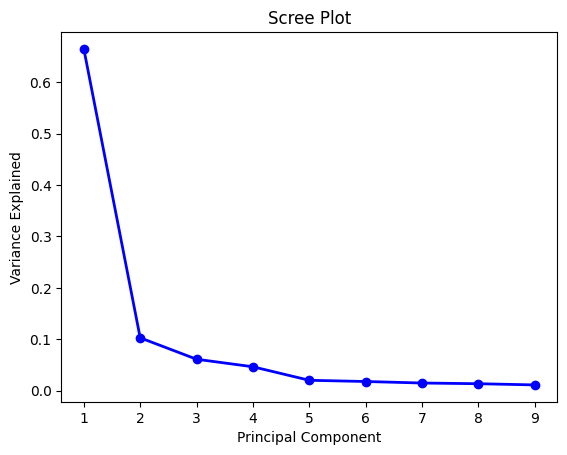

In [52]:
# Step 2: PCA

# Applying PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled_df)

# The number of components chosen by PCA
n_components = pca.n_components_
print(f"PCA reduced the feature space to {n_components} components.")

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

##Continued

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [54]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_combined, test_size=0.3, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y_combined, test_size=0.3, random_state=42)

In [55]:
X_train.shape
# y_train.shape

(21099, 9)

In [56]:
X_train.shape, X_test.shape

((21099, 9), (9043, 9))

In [57]:
print(X_train.shape)
print(y_train.shape)

(21099, 9)
(21099,)


## SVM (Non-Linear)

In [58]:
from sklearn.svm import SVC
# Initialize and train the SVM model with a non-linear kernel (e.g., RBF)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [59]:
y_predict = svm_model.predict(X_test)

In [60]:
svm_model.score(X_test, y_test) #testing accuracy

0.8763684617936526

In [61]:
svm_model.score(X_train, y_train) #training accuracy

0.8785250485805014

In [62]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report

f1_score(y_test, y_predict, average='macro')

0.9091136810583182

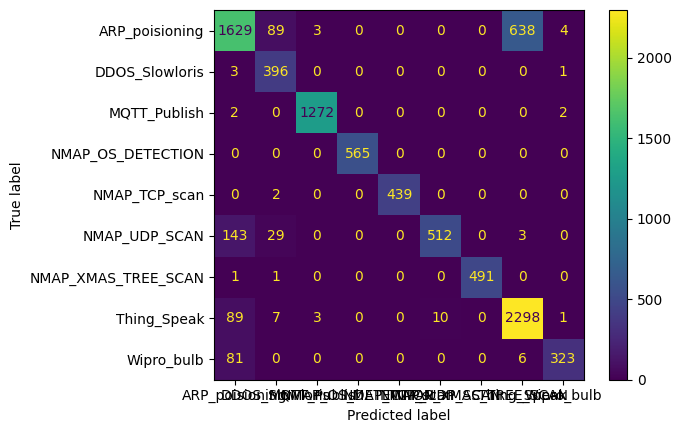

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [73]:
accuracy_score(y_test, y_predict) #similar to clf.score

0.8763684617936526

In [74]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.8362423 , 0.75572519, 0.99530516, 1.        , 1.        ,
        0.98084291, 1.        , 0.7803056 , 0.97583082]),
 array([0.68937791, 0.99      , 0.9968652 , 1.        , 0.99546485,
        0.74526929, 0.9959432 , 0.95431894, 0.78780488]),
 array([0.75574113, 0.85714286, 0.99608457, 1.        , 0.99772727,
        0.84698098, 0.99796748, 0.85858397, 0.87179487]),
 array([2363,  400, 1276,  565,  441,  687,  493, 2408,  410]))

In [75]:
print(classification_report(y_test, y_predict))

                     precision    recall  f1-score   support

     ARP_poisioning       0.84      0.69      0.76      2363
     DDOS_Slowloris       0.76      0.99      0.86       400
       MQTT_Publish       1.00      1.00      1.00      1276
  NMAP_OS_DETECTION       1.00      1.00      1.00       565
      NMAP_TCP_scan       1.00      1.00      1.00       441
      NMAP_UDP_SCAN       0.98      0.75      0.85       687
NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       493
        Thing_Speak       0.78      0.95      0.86      2408
         Wipro_bulb       0.98      0.79      0.87       410

           accuracy                           0.88      9043
          macro avg       0.92      0.91      0.91      9043
       weighted avg       0.88      0.88      0.87      9043



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different numbers of PCA components
for n in range(1, n_components+1):
    # Applying PCA
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled_df)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_combined, test_size=0.3, random_state=42)

    # # Training KNN classifier
    # naive_bayes = GaussianNB()
    # naive_bayes.fit(X_train, y_train)

    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train, y_train)

    # Calculating training accuracy
    train_pred = svm_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculating testing accuracy
    test_pred = svm_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)



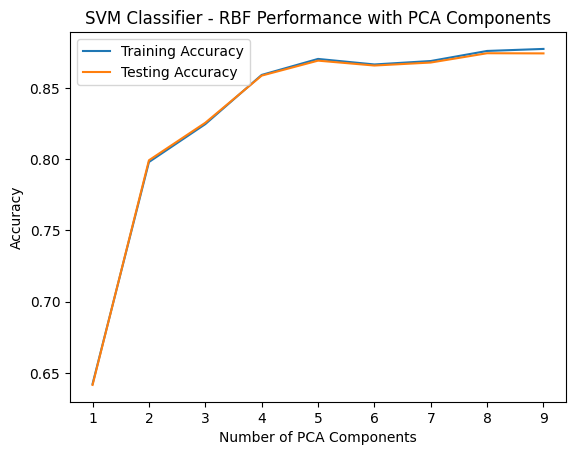

In [64]:
# Plotting the training and testing accuracies
plt.plot(range(1, n_components+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, n_components+1), test_accuracies, label='Testing Accuracy')
plt.title('SVM Classifier - RBF Performance with PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

Train_acc = []
Test_acc = []
Node_count = []
parameter_value = []

# Range of values for the regularization parameter C
C_range = np.arange(0.1, 10.1, 3)

for C in C_range:
    temp_train_acc = []
    temp_test_acc = []

    for _ in range(10):
        # Train an SVM classifier with the current C value
        svm = SVC(kernel='rbf', C=C)
        svm.fit(X_train, y_train)

        # Calculate training and testing accuracies
        temp_train_acc.append(svm.score(X_train, y_train))
        temp_test_acc.append(svm.score(X_test, y_test))

    # Calculate mean training and testing accuracies for this C value
    Train_acc.append(np.mean(temp_train_acc))
    Test_acc.append(np.mean(temp_test_acc))
    parameter_value.append(C)

# Find the optimal parameter value based on testing accuracy
optimal_index = np.argmax(Test_acc)
optimal_parameter_value = parameter_value[optimal_index]



Optimal Parameter Value (C): 9.1


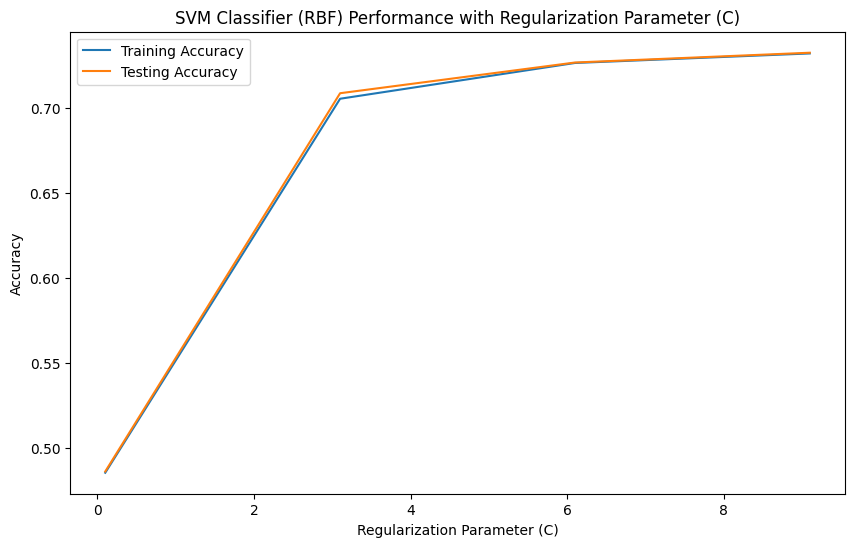

In [78]:
print("Optimal Parameter Value (C):", optimal_parameter_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_range, Train_acc, label='Training Accuracy')
plt.plot(C_range, Test_acc, label='Testing Accuracy')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('SVM Classifier (RBF) Performance with Regularization Parameter (C)')
plt.legend()
plt.show()

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Initialize SVM classifier with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf', probability=True)

# Train the SVM classifier
svm_classifier_rbf.fit(X_train, y_train)

# Predict probabilities of the positive class for the test data
y_proba_rbf = svm_classifier_rbf.predict_proba(X_test)

# Calculate the ROC AUC score
auc_score_rbf = roc_auc_score(y_test, y_proba_rbf, multi_class='ovr')
print("ROC AUC Score for SVM with RBF kernel:", auc_score_rbf)


ROC AUC Score for SVM with RBF kernel: 0.9515991437804181


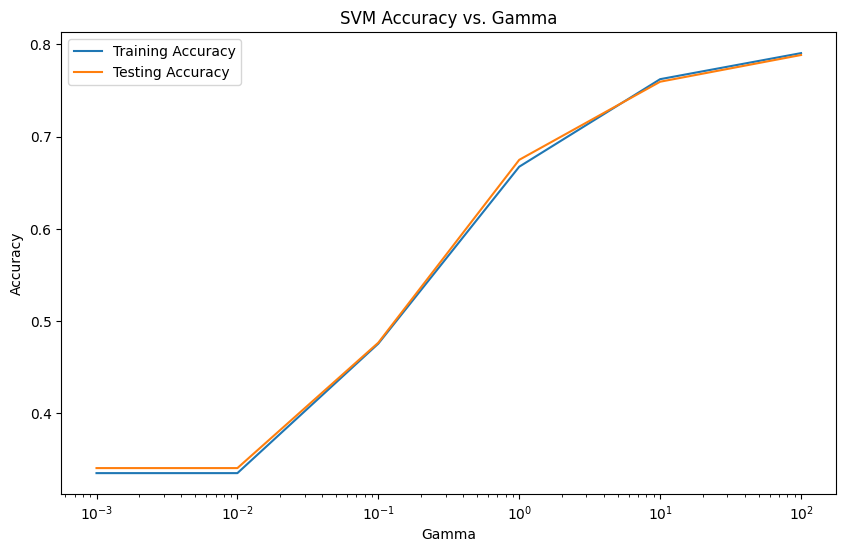

In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Lists to store results
Train_acc = []
Test_acc = []
Gamma_values = []
parameter_value = []

# Range of values for the gamma parameter
gamma_range = np.logspace(-3, 2, 6)  # Example: from 0.001 to 100

for gamma in gamma_range:
    temp_train_acc = []
    temp_test_acc = []

    for _ in range(10):
        # Train an SVM classifier with the current gamma value
        svm = SVC(kernel='rbf', gamma=gamma)
        svm.fit(X_train, y_train)

        # Calculate training and testing accuracies
        temp_train_acc.append(svm.score(X_train, y_train))
        temp_test_acc.append(svm.score(X_test, y_test))

    # Calculate mean training and testing accuracies for this gamma value
    Train_acc.append(np.mean(temp_train_acc))
    Test_acc.append(np.mean(temp_test_acc))
    parameter_value.append(gamma)

# Find the optimal parameter value based on testing accuracy
optimal_index = np.argmax(Test_acc)
optimal_parameter_value = parameter_value[optimal_index]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(parameter_value, Train_acc, label='Training Accuracy')
plt.plot(parameter_value, Test_acc, label='Testing Accuracy')
plt.xscale('log')  # Use a logarithmic scale for gamma
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Gamma')
plt.legend()
plt.show()


In [83]:
print(f'Optimal Parameter Value for Gamma: {optimal_parameter_value}')

Optimal Parameter Value for Gamma: 100.0


## ----------------------------  IGNORE  -------------------------------------------

In [ ]:
# SVM with non-linear kernel (RBF)
svm_rbf_params = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
svm_rbf_grid = GridSearchCV(SVC(kernel='rbf'), svm_rbf_params, cv=5)
svm_rbf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]})

In [ ]:
y_predict = svm_rbf_grid.predict(X_test)

In [ ]:
svm_rbf_grid.score(X_test, y_test) #testing accuracy

0.9321021784805927

In [ ]:
svm_rbf_grid.score(X_train, y_train) #training accuracy

0.9357315512583535

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report

f1_score(y_test, y_predict, average='weighted')

0.9320889899489542

In [ ]:
print(classification_report(y_test, y_predict))

                     precision    recall  f1-score   support

     ARP_poisioning       0.88      0.88      0.88      2393
     DDOS_Slowloris       0.91      0.99      0.95       400
       MQTT_Publish       1.00      1.00      1.00      1266
  NMAP_OS_DETECTION       1.00      1.00      1.00       547
      NMAP_TCP_scan       1.00      1.00      1.00       441
      NMAP_UDP_SCAN       1.00      0.89      0.94       699
NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       489
        Thing_Speak       0.89      0.93      0.91      2398
         Wipro_bulb       0.98      0.82      0.90       410

           accuracy                           0.93      9043
          macro avg       0.96      0.94      0.95      9043
       weighted avg       0.93      0.93      0.93      9043



In [ ]:
print(svm_rbf_grid.cv_results_)

{'mean_fit_time': array([ 4.74551396,  8.49986658, 15.37408128,  3.49552875,  5.34674244,
        9.35652204,  2.76908836,  4.0592773 ,  5.81353412]), 'std_fit_time': array([0.74848419, 1.0299336 , 0.2041653 , 0.65564307, 1.05936077,
       1.00001457, 0.54903565, 0.68283941, 0.59833482]), 'mean_score_time': array([2.41453748, 4.49800463, 5.52384839, 2.07870579, 2.28145037,
       4.13451252, 1.24303789, 2.14591465, 2.98981218]), 'std_score_time': array([0.24237599, 1.2618516 , 1.03812466, 0.55495154, 0.01362033,
       0.82408901, 0.16617187, 0.5258916 , 0.68618619]), 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1, 0.1, 0.01, 1, 0.1, 0.01, 1, 0.1, 0.01],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
   

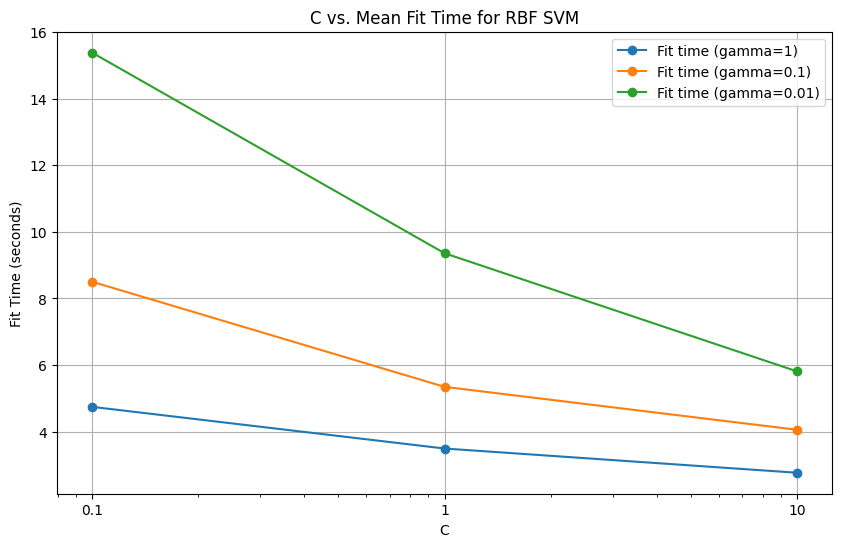

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Assuming you have already performed data splitting and grid search
# svm_rbf_grid is the trained GridSearchCV object

# Get the results from GridSearchCV
results = svm_rbf_grid.cv_results_

# Get the values of C and gamma used in grid search
Cs = svm_rbf_params['C']
gammas = svm_rbf_params['gamma']

# Reshape the mean fit times to match the shape of the grid
fit_times = np.array(results['mean_fit_time']).reshape(len(Cs), len(gammas))

# Plot the graph
plt.figure(figsize=(10, 6))
for i, gamma in enumerate(gammas):
    plt.plot(Cs, fit_times[:, i], label=f'Fit time (gamma={gamma})', marker='o')

plt.xscale('log')  # Use logarithmic scale for better visualization
plt.xlabel('C')
plt.ylabel('Fit Time (seconds)')
plt.title('C vs. Mean Fit Time for RBF SVM')
plt.xticks(Cs, Cs)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Get the mean test scores for each combination of C and gamma
mean_test_scores = results['mean_test_score']

# Reshape the mean test scores to match the shape of the grid
mean_test_scores = np.array(mean_test_scores).reshape(len(Cs), len(gammas))

# Print the mean test scores
for i, gamma in enumerate(gammas):
    for j, C_value in enumerate(Cs):
        print(f"C={C_value}, gamma={gamma}: Test Accuracy = {mean_test_scores[j, i]}")


NameError: name 'results' is not defined

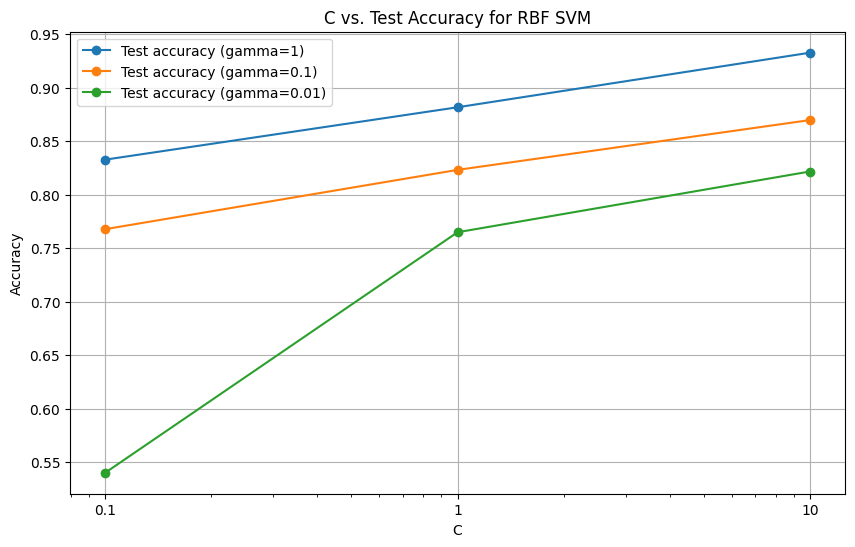

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already obtained the results dictionary

# Extract the values of C and gamma used in grid search
Cs = svm_rbf_params['C']
gammas = svm_rbf_params['gamma']

# Extract the mean test scores for each combination of C and gamma
mean_test_scores = results['mean_test_score'].reshape(len(Cs), len(gammas))

# Plotting
plt.figure(figsize=(10, 6))
for i, gamma in enumerate(gammas):
    plt.plot(Cs, mean_test_scores[:, i], label=f'Test accuracy (gamma={gamma})', marker='o')

plt.xscale('log')  # Use logarithmic scale for C for better visualization
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs. Test Accuracy for RBF SVM')
plt.xticks(Cs, Cs)
plt.legend()
plt.grid(True)
plt.show()


## SVM (Linear)

In [ ]:
from sklearn.svm import SVC
# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_predict = svm_model.predict(X_test)

In [ ]:
svm_model.score(X_test, y_test) #testing accuracy

0.8255003870396992

In [ ]:
svm_model.score(X_train, y_train) #training accuracy

0.8276221621877814

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report

f1_score(y_test, y_predict, average='weighted')

0.817430068777357

In [ ]:
confusion_matrix(y_test, y_predict)

array([[1232,   74,    5,   12,    0,    0,    0, 1062,    8],
       [   4,  396,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1263,    1,    0,    0,    0,    0,    1],
       [   0,    0,    0,  547,    0,    0,    0,    0,    0],
       [   0,    2,    0,    0,  439,    0,    0,    0,    0],
       [ 185,   34,    0,    0,    0,  478,    0,    1,    1],
       [   0,    1,    0,    0,    0,    0,  487,    1,    0],
       [  52,    6,    2,    0,    0,   10,    0, 2322,    6],
       [  20,    0,    0,    0,    0,    1,    0,   88,  301]])

In [ ]:
accuracy_score(y_test, y_predict) #similar to clf.score

0.8255003870396992

In [ ]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.82463186, 0.77192982, 0.99448819, 0.97678571, 1.        ,
        0.97750511, 1.        , 0.66839378, 0.94952681]),
 array([0.51483494, 0.99      , 0.99763033, 1.        , 0.99546485,
        0.68383405, 0.99591002, 0.96830692, 0.73414634]),
 array([0.6339079 , 0.86746988, 0.99605678, 0.98825655, 0.99772727,
        0.8047138 , 0.99795082, 0.79087193, 0.82806052]),
 array([2393,  400, 1266,  547,  441,  699,  489, 2398,  410]))

In [ ]:
print(classification_report(y_test, y_predict))

                     precision    recall  f1-score   support

     ARP_poisioning       0.82      0.51      0.63      2393
     DDOS_Slowloris       0.77      0.99      0.87       400
       MQTT_Publish       0.99      1.00      1.00      1266
  NMAP_OS_DETECTION       0.98      1.00      0.99       547
      NMAP_TCP_scan       1.00      1.00      1.00       441
      NMAP_UDP_SCAN       0.98      0.68      0.80       699
NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       489
        Thing_Speak       0.67      0.97      0.79      2398
         Wipro_bulb       0.95      0.73      0.83       410

           accuracy                           0.83      9043
          macro avg       0.91      0.88      0.88      9043
       weighted avg       0.85      0.83      0.82      9043



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test) #testing accuracy

0.8414243060931107

In [ ]:
clf.score(X_train, y_train) #training accuracy

0.8434049007061946

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report

f1_score(y_test, y_predict, average='weighted')

0.8279210613893464

In [ ]:
confusion_matrix(y_test, y_predict)

array([[2193,   43,    0,   36,    0,    0,    0,  112,    9],
       [  45,  274,    0,   81,    0,    0,    0,    0,    0],
       [   1,    0, 1255,    2,    0,    0,    0,    7,    1],
       [   0,    0,    0,  547,    0,    0,    0,    0,    0],
       [   2,    0,    0,  439,    0,    0,    0,    0,    0],
       [  47,    0,    0,   35,    0,  617,    0,    0,    0],
       [   1,    1,    0,    0,    0,    0,  487,    0,    0],
       [ 298,    2,    0,   10,    0,    0,    0, 2088,    0],
       [  84,    0,    0,  173,    0,    0,    0,    5,  148]])

In [ ]:
accuracy_score(y_test, y_predict) #similar to clf.score

0.8414243060931107

In [ ]:
precision_recall_fscore_support(y_test, y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.82104081, 0.85625   , 1.        , 0.41345427, 0.        ,
        1.        , 1.        , 0.94394213, 0.93670886]),
 array([0.9164229 , 0.685     , 0.99131122, 1.        , 0.        ,
        0.88268956, 0.99591002, 0.8707256 , 0.36097561]),
 array([0.86611374, 0.76111111, 0.99563665, 0.58502674, 0.        ,
        0.93768997, 0.99795082, 0.90585683, 0.52112676]),
 array([2393,  400, 1266,  547,  441,  699,  489, 2398,  410]))

In [ ]:
print(classification_report(y_test, y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

     ARP_poisioning       0.82      0.92      0.87      2393
     DDOS_Slowloris       0.86      0.69      0.76       400
       MQTT_Publish       1.00      0.99      1.00      1266
  NMAP_OS_DETECTION       0.41      1.00      0.59       547
      NMAP_TCP_scan       0.00      0.00      0.00       441
      NMAP_UDP_SCAN       1.00      0.88      0.94       699
NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       489
        Thing_Speak       0.94      0.87      0.91      2398
         Wipro_bulb       0.94      0.36      0.52       410

           accuracy                           0.84      9043
          macro avg       0.77      0.74      0.73      9043
       weighted avg       0.84      0.84      0.83      9043



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.9, 'x[1] <= -0.05\ngini = 0.82\nsamples = 21099\nvalue = [5594, 966, 2836, 1192, 1065, 1698, 1250, 5653, 845]'),
 Text(0.25, 0.7, 'x[3] <= -0.058\ngini = 0.603\nsamples = 12560\nvalue = [5514, 789, 25, 0, 1, 131, 2, 5594, 504]'),
 Text(0.125, 0.5, 'x[6] <= -0.067\ngini = 0.424\nsamples = 5740\nvalue = [800, 675, 23, 0, 1, 3, 0, 4227, 11]'),
 Text(0.0625, 0.3, 'x[1] <= -0.287\ngini = 0.405\nsamples = 923\nvalue = [227, 675, 1, 0, 1, 1, 0, 8, 10]'),
 Text(0.03125, 0.1, 'gini = 0.229\nsamples = 774\nvalue = [96, 673, 0, 0, 0, 0, 0, 5, 0]'),
 Text(0.09375, 0.1, 'gini = 0.222\nsamples = 149\nvalue = [131, 2, 1, 0, 1, 1, 0, 3, 10]'),
 Text(0.1875, 0.3, 'x[0] <= -1.086\ngini = 0.219\nsamples = 4817\nvalue = [573, 0, 22, 0, 0, 2, 0, 4219, 1]'),
 Text(0.15625, 0.1, 'gini = 0.342\nsamples = 415\nvalue = [325, 0, 0, 0, 0, 2, 0, 88, 0]'),
 Text(0.21875, 0.1, 'gini = 0.116\nsamples = 4402\nvalue = [248, 0, 22, 0, 0, 0, 0, 4131, 1]'),
 Text(0.375, 0.5, 'x[7] <= 0.136\ngini = 0.476\nsamp

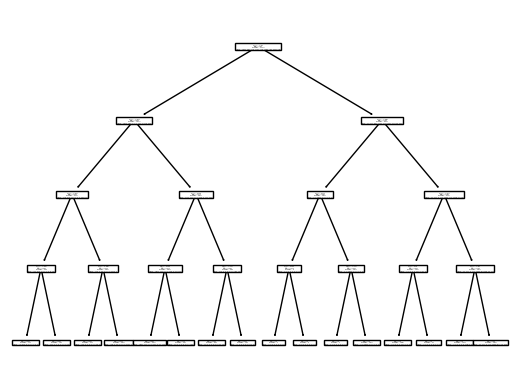

In [ ]:
from sklearn import tree

tree.plot_tree(clf)